2.9.2


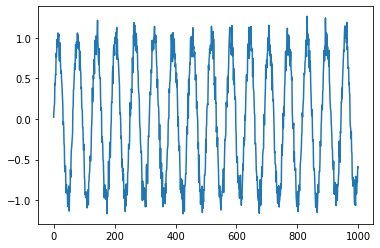

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

# make the original data
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1

# plot it
plt.plot(series)
plt.show()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape,"\n\n")

### try autoregressive RNN model
i = Input(shape=(T, 1))
#Se lasciamo l'activation function de default (tanh) non otterremo buoni risultati! 
#La forecast prediction sarà sballata rispetto alla teorica! 

#Se usiamo activation=None la NN si riduce a una funzione lineare! Per cui abbiamo visto che si può 
#estrapolare il seno con un modello lineare. Ma proprio come prima, modello lineare sbaglia non appena subentra del rumore!

#Con il rumore e la tanh pure peggio, tipo seno molto smorzato...

#Con activation = relu e rumore simile, quasi come se mantenesse costante un certo valore 


x = SimpleRNN(15, activation='relu' )(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

#NB validation set è costituito solo da future datapoint e train da datapoint precedenti ai validation


# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)



X.shape (990, 10, 1) Y.shape (990,) 


Epoch 1/80


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 1s 22ms/step - loss: 0.5437 - val_loss: 0.3591
Epoch 2/80
16/16 [==============================] - 0s 8ms/step - loss: 0.2490 - val_loss: 0.1952
Epoch 3/80
16/16 [==============================] - 0s 10ms/step - loss: 0.1506 - val_loss: 0.1196
Epoch 4/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0953 - val_loss: 0.0774
Epoch 5/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0595 - val_loss: 0.0490
Epoch 6/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0392 - val_loss: 0.0350
Epoch 7/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0294 - val_loss: 0.0291
Epoch 8/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.0294
Epoch 9/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0251 - val_loss: 0.0263
Epoch 10/80
16/16 [==============================] - 0s 10ms/step - loss: 0.0228 - val_loss: 0.0255
Epoch 11/80
16/16 [========

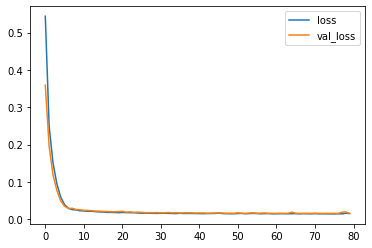

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


1/1 [==============================] - ETA: 0s

KeyboardInterrupt: ignored

1/1 [==============================] - 0s 23ms/step


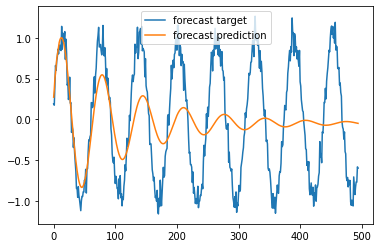

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

